# Importing Libraries and Loading the file

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the file
file_path = 'Unemployment Rate.xlsx'
data = pd.read_excel(file_path)

# Data Analysis and Preprocessing

In [3]:
# Clean the data by selecting relevant columns
cleaned_data = data[['Observation Date', 'Unemployment Rate']]

# Convert the 'Observation Date' column to datetime format using .loc to avoid the warning
cleaned_data.loc[:, 'Observation Date'] = pd.to_datetime(cleaned_data['Observation Date'])

# Set the 'Observation Date' column as the index
cleaned_data.set_index('Observation Date', inplace=True)

In [4]:
# Check for missing data
missing_data = cleaned_data.isnull().sum()

# Display the missing data information
missing_data.head()

Unemployment Rate    0
dtype: int64

In [5]:
# Perform basic analysis: Summary statistics and plot
summary_stats = cleaned_data.describe()

In [6]:
summary_stats

,Unemployment Rate
count,799.000000
mean,5.865957
std,1.685733
min,3.400000
25%,4.600000
50%,5.600000
75%,6.900000
max,14.800000


# Data Plotting

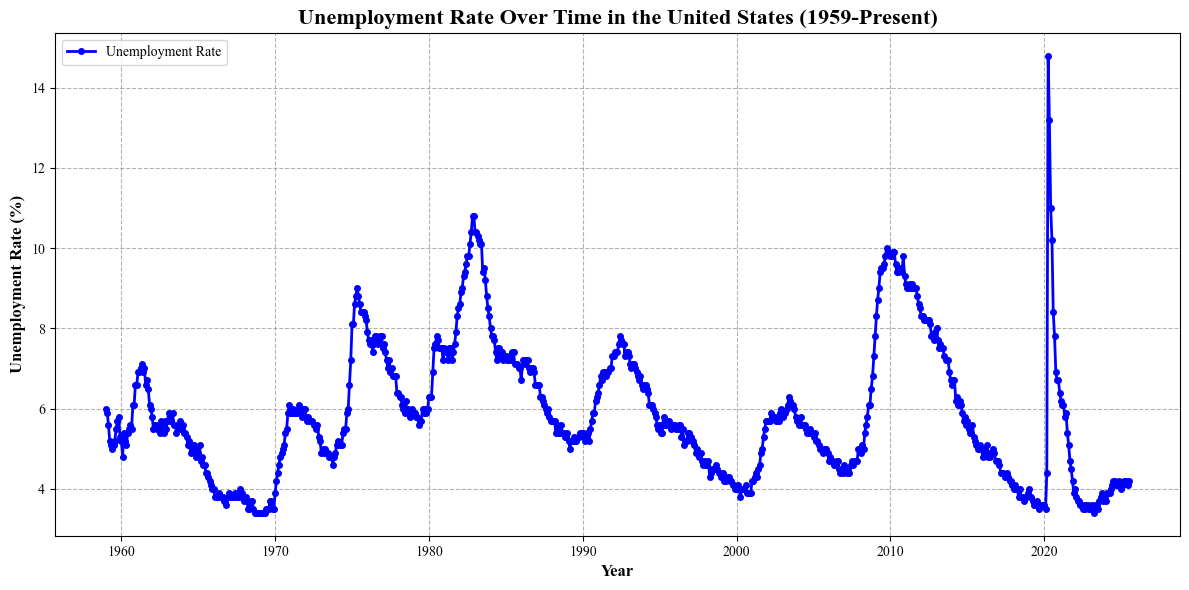

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Plot the unemployment rate over time with professional styling
plt.figure(figsize=(12, 6))

# Plot with a line and markers for better visibility
plt.plot(cleaned_data.index, cleaned_data['Unemployment Rate'], label='Unemployment Rate', color='b', marker='o', markersize=4, linestyle='-', linewidth=2)

# Add title 
plt.title('Unemployment Rate Over Time in the United States (1959-Present)', fontsize=16, fontweight='bold', family='Times New Roman')

# Add labels 
plt.xlabel('Year', fontsize=12, fontweight='bold', family='Times New Roman')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold', family='Times New Roman')

# Add grid 
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Customize tick marks and labels 
plt.xticks(fontsize=10, family='Times New Roman')
plt.yticks(fontsize=10, family='Times New Roman')

# Adding a legend 
plt.legend(loc='upper left', fontsize=10, prop={'family': 'Times New Roman'})

# Make layout tight to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Stochastic Properties and Pre-testing

# ACF, PACF, and ADF Test

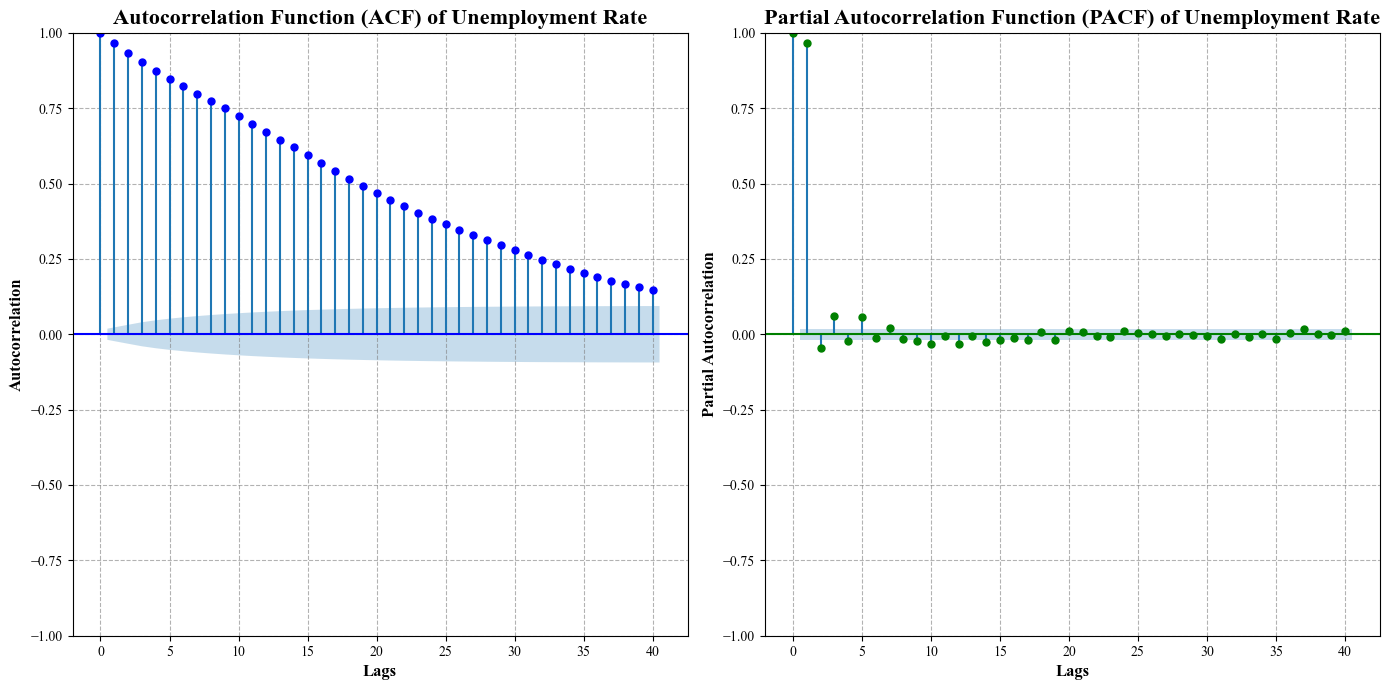

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

# Plot ACF and PACF 
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(121)
plot_acf(cleaned_data['Unemployment Rate'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF
plt.subplot(122)
plot_pacf(cleaned_data['Unemployment Rate'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
df_cleaned = cleaned_data

# Perform the Augmented Dickey-Fuller test on the 'Unemployment Rate' series
adf_result = adfuller(df_cleaned['Unemployment Rate'])

# Extract the ADF results
adf_statistic = adf_result[0]
adf_p_value = adf_result[1]
adf_critical_values = adf_result[4]

# Display the ADF result 
print("Augmented Dickey-Fuller Test Results")
print("-" * 50)
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_p_value:.4f}")
print("\nCritical Values:")
for key, value in adf_critical_values.items():
    print(f"  {key}: {value:.4f}")
print("-" * 50)

# Interpret the result
if adf_p_value < 0.05:
    print("Conclusion: The series is likely stationary (reject the null hypothesis).")
else:
    print("Conclusion: The series is likely non-stationary (fail to reject the null hypothesis).")


Augmented Dickey-Fuller Test Results
--------------------------------------------------
ADF Statistic: -3.4190
P-value: 0.0103

Critical Values:
  1%: -3.4386
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: The series is likely stationary (reject the null hypothesis).


# Differencing to make the Data Stationary

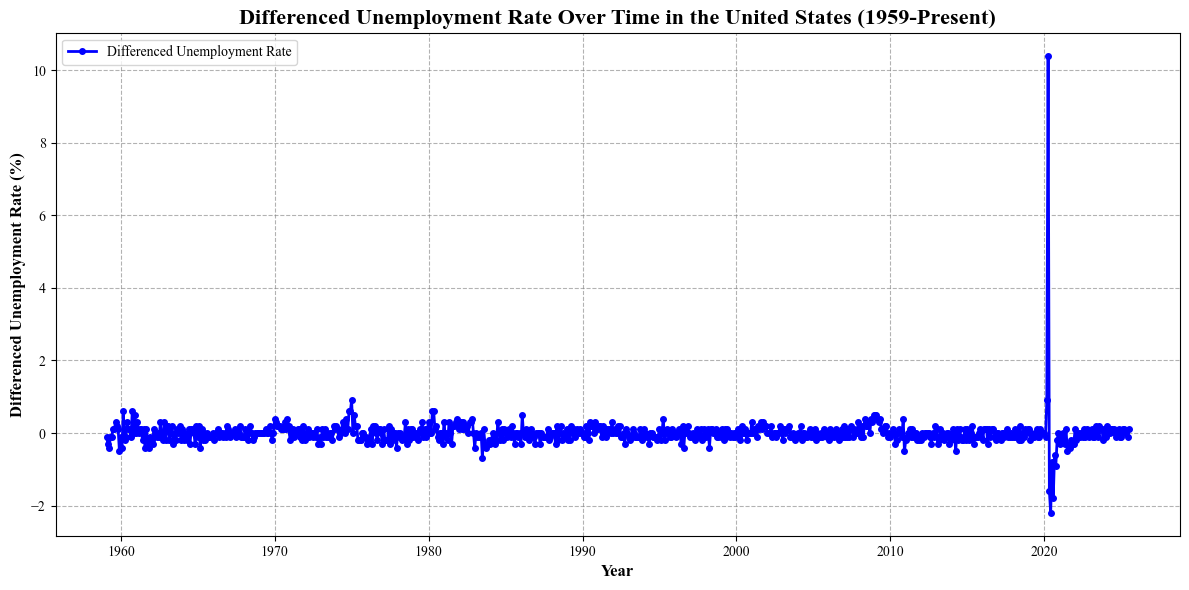

Augmented Dickey-Fuller Test Results for Differenced Data
--------------------------------------------------
ADF Statistic: -15.5277
P-value: 0.0000

Critical Values:
  1%: -3.4386
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: The differenced series is likely stationary (reject the null hypothesis).


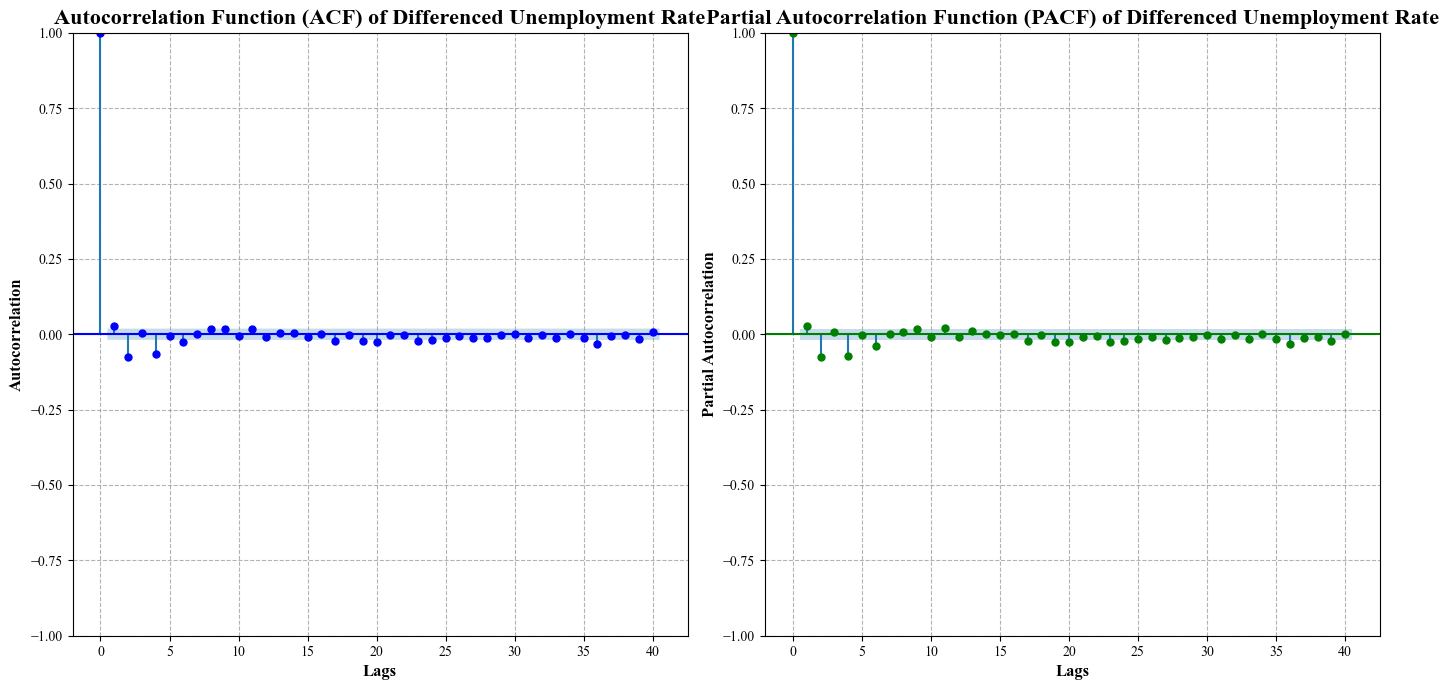

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams

# Set font to Times New Roman for all plots
rcParams['font.family'] = 'Times New Roman'

# Apply differencing to make the data stationary
df_cleaned['Unemployment Rate Diff'] = df_cleaned['Unemployment Rate'].diff()

# Drop the first row since it will be NaN due to the differencing
df_cleaned.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(12, 6))

plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label='Differenced Unemployment Rate', color='b', marker='o', markersize=4, linestyle='-', linewidth=2)
plt.title('Differenced Unemployment Rate Over Time in the United States (1959-Present)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Differenced Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Re-run the Augmented Dickey-Fuller test to check if the differenced series is stationary
adf_result_diff = adfuller(df_cleaned['Unemployment Rate Diff'])

# Extract the ADF results
adf_statistic_diff = adf_result_diff[0]
adf_p_value_diff = adf_result_diff[1]
adf_critical_values_diff = adf_result_diff[4]

# Display the ADF result for differenced data
print("Augmented Dickey-Fuller Test Results for Differenced Data")
print("-" * 50)
print(f"ADF Statistic: {adf_statistic_diff:.4f}")
print(f"P-value: {adf_p_value_diff:.4f}")
print("\nCritical Values:")
for key, value in adf_critical_values_diff.items():
    print(f"  {key}: {value:.4f}")
print("-" * 50)

# Interpret the result
if adf_p_value_diff < 0.05:
    print("Conclusion: The differenced series is likely stationary (reject the null hypothesis).")
else:
    print("Conclusion: The differenced series is likely non-stationary (fail to reject the null hypothesis).")

# Plot ACF and PACF for differenced Unemployment Rate
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(121)
plot_acf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF
plt.subplot(122)
plot_pacf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()


# Find Optimal AR Lag Using AIC and BIC

AIC and BIC Values for Different Lags
--------------------------------------------------
Lag 1: AIC = 915.0290, BIC = 929.0716
Lag 2: AIC = 911.7870, BIC = 930.5054
Lag 3: AIC = 912.7465, BIC = 936.1383
Lag 4: AIC = 910.2292, BIC = 938.2917
Lag 5: AIC = 911.9947, BIC = 944.7254
Lag 6: AIC = 912.7131, BIC = 950.1095
Lag 7: AIC = 914.5608, BIC = 956.6205
Lag 8: AIC = 915.9126, BIC = 962.6329
Lag 9: AIC = 917.3386, BIC = 968.7170
Lag 10: AIC = 919.0581, BIC = 975.0920
Lag 11: AIC = 919.3587, BIC = 980.0457
Lag 12: AIC = 921.1269, BIC = 986.4643
Lag 13: AIC = 921.9603, BIC = 991.9456
Lag 14: AIC = 921.6016, BIC = 996.2322
Lag 15: AIC = 923.0053, BIC = 1002.2786
Lag 16: AIC = 924.8610, BIC = 1008.7744
Lag 17: AIC = 926.0114, BIC = 1014.5623
Lag 18: AIC = 927.7845, BIC = 1020.9703
Lag 19: AIC = 929.0473, BIC = 1026.8655
Lag 20: AIC = 930.3470, BIC = 1032.7950
--------------------------------------------------
Optimal lag based on AIC: 4
Optimal lag based on BIC: 1


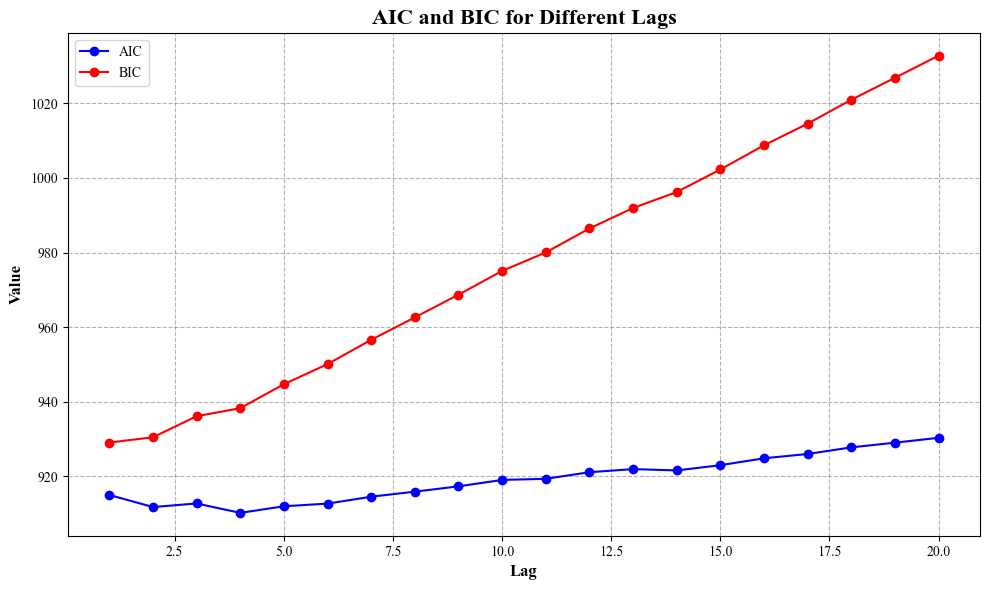

In [11]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Set the frequency to monthly (MS - Month Start) if the data is monthly
df_cleaned = df_cleaned.asfreq('MS')

# Max lag to check
max_lag = 20  

# Store the AIC and BIC values for each lag
aic_values = []
bic_values = []
lags = list(range(1, max_lag + 1))

# Loop over different lags and fit the AR model
for lag in lags:
    model = AutoReg(df_cleaned['Unemployment Rate Diff'], lags=lag)  # Use differenced series
    ar_model_fitted = model.fit()
    
    # Store the AIC and BIC values for each lag
    aic_values.append(ar_model_fitted.aic)
    bic_values.append(ar_model_fitted.bic)

# Find the lag with the lowest AIC and BIC
optimal_aic_lag = lags[np.argmin(aic_values)]
optimal_bic_lag = lags[np.argmin(bic_values)]

# Print AIC and BIC values for each lag
print("AIC and BIC Values for Different Lags")
print("-" * 50)
for lag, aic, bic in zip(lags, aic_values, bic_values):
    print(f"Lag {lag}: AIC = {aic:.4f}, BIC = {bic:.4f}")

# Print the optimal lags based on AIC and BIC
print("-" * 50)
print(f"Optimal lag based on AIC: {optimal_aic_lag}")
print(f"Optimal lag based on BIC: {optimal_bic_lag}")

# Plot the AIC and BIC values for each lag
plt.figure(figsize=(10, 6))
plt.plot(lags, aic_values, label='AIC', color='b', marker='o')
plt.plot(lags, bic_values, label='BIC', color='r', marker='o')
plt.xlabel('Lag', fontsize=12, fontweight='bold')
plt.ylabel('Value', fontsize=12, fontweight='bold')
plt.title('AIC and BIC for Different Lags', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.tight_layout()
plt.show()

# Auto Regressive Model


AR-4 Model Summary
                              AutoReg Model Results                               
Dep. Variable:     Unemployment Rate Diff   No. Observations:                  638
Model:                         AutoReg(4)   Log Likelihood                 223.988
Method:                   Conditional MLE   S.D. of innovations              0.170
Date:                    Tue, 30 Dec 2025   AIC                           -435.976
Time:                            20:33:06   BIC                           -409.264
Sample:                        06-01-1959   HQIC                          -425.604
                             - 03-01-2012                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0026      0.007      0.390      0.697      -0.011       0.016
Unemployment Rate Diff.L1     0.01

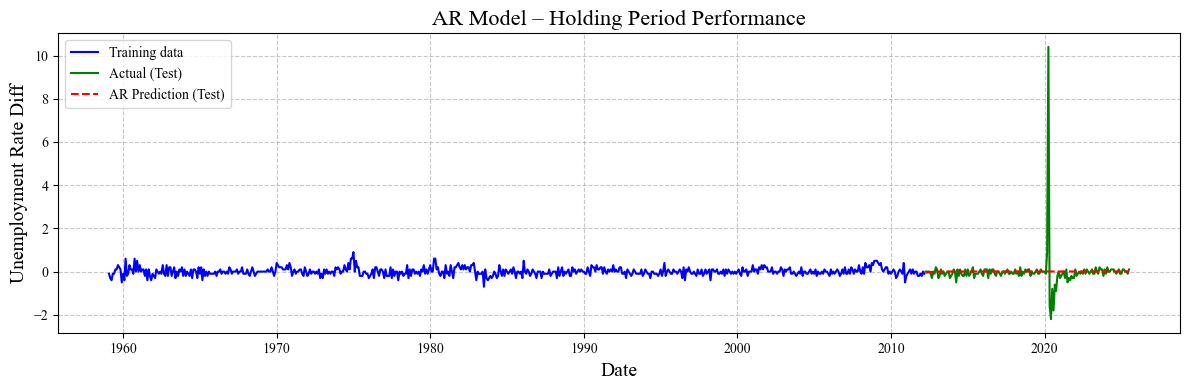

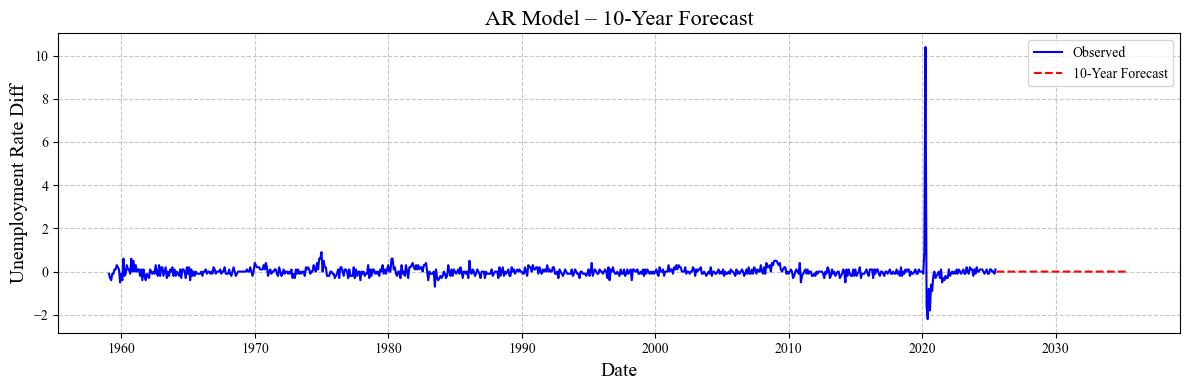

MAE (Mean Absolute Error): 0.2292
MSE (Mean Squared Error): 0.7798
RMSE (Root Mean Squared Error): 0.8831
Ljung-Box Test for Residuals
      lb_stat  lb_pvalue
12  19.289776   0.081771
  Metric     Value
0    MAE  0.229228
1    MSE  0.779839
2   RMSE  0.883085


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Use the optimal lag (e.g., optimal_aic_lag or optimal_bic_lag)
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if you prefer

# Assuming 'df_cleaned' contains the original dataset with 'Unemployment Rate' and 'Observation Date'
df_cleaned = cleaned_data  # Replace with your actual cleaned data
df_cleaned = df_cleaned.asfreq('MS')  # Ensure the frequency is set to monthly

# Split the data into training and testing sets (assuming df_cleaned is your DataFrame)
train = df_cleaned['Unemployment Rate Diff'][:int(0.8 * len(df_cleaned))]
test = df_cleaned['Unemployment Rate Diff'][int(0.8 * len(df_cleaned)):]

# Fit the AR model with the optimal lag
ar_model = AutoReg(train, lags=optimal_lag).fit()

# Print AR model summary
print(f"\nAR-{optimal_lag} Model Summary")
print(ar_model.summary())

# One-step-ahead predictions for the test period
test_pred = ar_model.predict(
    start=test.index[0],
    end=test.index[-1],
    dynamic=False
)

# Plotting the results with professional settings
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred, label="AR Prediction (Test)", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("AR Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Refit the model on the full dataset (for forecasting)
ar_full = AutoReg(df_cleaned['Unemployment Rate Diff'], lags=optimal_lag).fit()

# Forecast for the next 10 years (120 months)
forecast_steps = 120  # 10 years * 12 months
forecast_120 = ar_full.predict(
    start=len(df_cleaned),
    end=len(df_cleaned) + forecast_steps - 1,
    dynamic=False
)

# Create a new time index for the forecasted period (next 10 years)
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_series = pd.Series(forecast_120, index=forecast_index)

# Plot the original data and the forecasted values with professional settings
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_series.index, forecast_series, label="10-Year Forecast", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("AR Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Step 7: Model Evaluation – Calculate MAE, MSE, RMSE, and MAPE
y_true = test.values
y_pred = test_pred.values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE (Mean Absolute Error): {mae:.4f}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f'MSE (Mean Squared Error): {mse:.4f}')

# Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(mse)
print(f'RMSE (Root Mean Squared Error): {rmse_value:.4f}')


# Model residuals (actual − fitted)
resid = ar_model.resid

# Step 8: Perform the Ljung-Box test for autocorrelation in residuals
lb = acorr_ljungbox(resid, lags=[12], return_df=True)
print("Ljung-Box Test for Residuals")
print(lb)

# Step 9: Create a table with MAE, MSE, RMSE, and MAPE metrics
accuracy_table = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE"],
    "Value": [mae, mse, rmse_value]
})

# Display the accuracy table
print(accuracy_table)


# Conversion to Real Values


AR-4 Model Summary
                            AutoReg Model Results                             
Dep. Variable:      Unemployment Rate   No. Observations:                  638
Model:                     AutoReg(4)   Log Likelihood                 220.998
Method:               Conditional MLE   S.D. of innovations              0.171
Date:                Tue, 30 Dec 2025   AIC                           -429.997
Time:                        20:33:07   BIC                           -403.285
Sample:                    06-01-1959   HQIC                          -419.624
                         - 03-01-2012                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0673      0.027      2.522      0.012       0.015       0.120
Unemployment Rate.L1     1.0323      0.039     26.406      0.000       0.956     

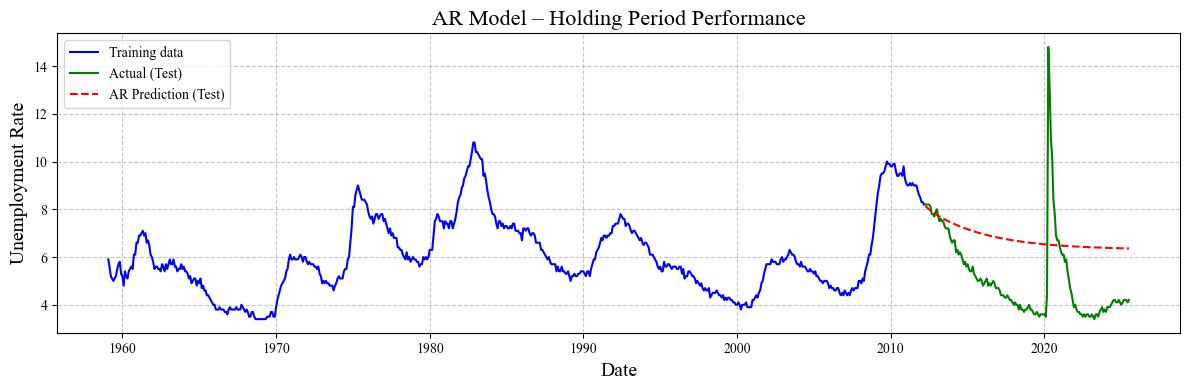

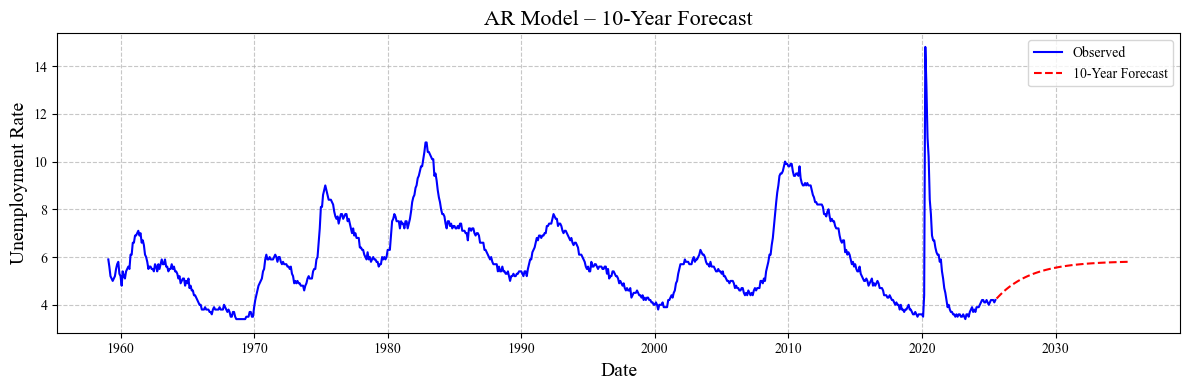

MAE (Mean Absolute Error): 1.9949
MSE (Mean Squared Error): 5.3162
RMSE (Root Mean Squared Error): 2.3057
Ljung-Box Test for Residuals
      lb_stat  lb_pvalue
12  32.666526   0.001091
  Metric     Value
0    MAE  1.994947
1    MSE  5.316196
2   RMSE  2.305688


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Assuming 'df_cleaned' contains the original dataset with 'Unemployment Rate' and 'Observation Date'
df_cleaned = cleaned_data  # Use the original cleaned data
df_cleaned = df_cleaned.asfreq('MS')  # Ensure the frequency is set to monthly

# Split the data into training and testing sets (assuming df_cleaned is your DataFrame)
train = df_cleaned['Unemployment Rate'][:int(0.8 * len(df_cleaned))]
test = df_cleaned['Unemployment Rate'][int(0.8 * len(df_cleaned)):]

# Fit the AR model with the optimal lag (you can choose optimal_aic_lag or optimal_bic_lag)
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if you prefer
ar_model = AutoReg(train, lags=optimal_lag).fit()

# Print AR model summary
print(f"\nAR-{optimal_lag} Model Summary")
print(ar_model.summary())

# One-step-ahead predictions for the test period
test_pred = ar_model.predict(
    start=test.index[0],
    end=test.index[-1],
    dynamic=False
)

# Plotting the results with professional settings
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred, label="AR Prediction (Test)", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("AR Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Refit the model on the full dataset (for forecasting)
ar_full = AutoReg(df_cleaned['Unemployment Rate'], lags=optimal_lag).fit()

# Forecast for the next 10 years (120 months)
forecast_steps = 120  # 10 years * 12 months
forecast_120 = ar_full.predict(
    start=len(df_cleaned),
    end=len(df_cleaned) + forecast_steps - 1,
    dynamic=False
)

# Create a new time index for the forecasted period (next 10 years)
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_series = pd.Series(forecast_120, index=forecast_index)

# Plot the original data and the forecasted values with professional settings
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label="Observed", color='b')
plt.plot(forecast_series.index, forecast_series, label="10-Year Forecast", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("AR Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Step 7: Model Evaluation – Calculate MAE, MSE, RMSE, and MAPE
y_true = test.values
y_pred = test_pred.values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE (Mean Absolute Error): {mae:.4f}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f'MSE (Mean Squared Error): {mse:.4f}')

# Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(mse)
print(f'RMSE (Root Mean Squared Error): {rmse_value:.4f}')

# Ljung-Box Test for Residuals
resid = ar_model.resid
lb = acorr_ljungbox(resid, lags=[12], return_df=True)
print("Ljung-Box Test for Residuals")
print(lb)

# Create a table with MAE, MSE, RMSE, and MAPE metrics
accuracy_table = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE"],
    "Value": [mae, mse, rmse_value]
})

# Display the accuracy table
print(accuracy_table)
